<a href="https://colab.research.google.com/github/ricardoatom/Bootcamp-Data-Science/blob/main/Notebook/Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 01**

---
  Bootcamp de Data Science Aplicada realizado pela Alura com objetivo de aprofundar e expandir o conhecimento em linguagens que compõem a formação do cientista de dados. Ferramentas a serem utilizadas: Python, Pandas, Seaborn, Jupyter, Colab, Scikit-Learn, entre outras.


> Importando biblioteca e dados




## **Importando dados e bibliotecas**

Estamos analisando gastos no ambiente hospitalar do SUS (Serviço Único de Saúde), a partir de 2008. Fonte de dados: DATASUS (https://datasus.saude.gov.br/informacoes-de-saude-tabnet/)






In [14]:
import pandas as pd                              
import matplotlib.pyplot as plt                  
import matplotlib.ticker as ticker               

In [15]:
url = 'https://raw.githubusercontent.com/ricardoatom/Bootcamp-Data-Science/main/Dados/interna%C3%A7%C3%B5es.csv'

In [16]:
#skiprows: descartar as primeiras linhas que vieram no arquivo txt desnecessários
#sep: o arquivo veio com separados ";"
#skipfooter: descartar as últimas 12 linhas
#thousas: separar por milhares e decimal: separar as unidades decimais por "," 

dados = pd.read_csv(url, encoding = "ISO-8859-1", skiprows = 3, sep=";", skipfooter=12, thousands=".", decimal = ",")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


## **Comandos e visualizações**

In [17]:
#head():comando para visualizar as 5 primeiras linhas
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84

In [18]:
#tail(): comando para visualizar as 5 últimas linhas.
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,89585823.81,96174533.70,92176170.61,94228360.83,90655015.78,91242720.70,82934746.93,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,1.022983e+08,1.002601e+08,95917106.56,1.023316e+08,93971904.79,90775418.13,94908336.74,91437940.91,1.028761e+08,83000318.02,82381774.95,86051002.13,1.005310e+08,101374341.51,1.195865e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,15676843.15,16956118.78,17043069.32,17477126.81,15488155.75,16596703.72,15353997.67,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,1.987093e+07,1.891386e+07,19591383.84,1.893544e+07,17230688.81,17895244.76,18115134.64,19542439.88,1.903279e+07,17410262.53,17913161.92,17331445.92,1.875556e+07,19241624.02,2.172158e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,15509614.84,16372281.19,16231682.70,16044219.39,16146542.89,15487676.02,14770731.99,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,1.631481e+07,1.676358e+07,15608982.84,1.585564e+07,15811477.04,15029205.51,15249241.20,15046851.63,1.488682e+07,12546999.04,13604225.34,13151005.63,1.637164e+07,17790649.87,2.036924e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.22,23520045.07,25369725.89,24404417.4

In [19]:
#describe: descreve informações essenciais da tabela.
dados.describe()                                  

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
count,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01
mean,1.512685e+07,2.271016e+07,2.459419e+07,2.543196e+07,2.651125e+07,2.785858e+07,2.833297e+07,2.780032e+07,2.788751e+07,2.714885e+07,2.474878e+07,2.873955e+07,2.777958e+07,2.802152e+07,3.118086e+07,3.055947e+07,3.206774e+07,3.158067e+07,3.261120e+07,3.306823e+07,3.241981e+07,3.218939e+07,3.116798e+07,3.156009e+07,2.992881e+07,3.299925e+07,3.341603e+07,3.386193e+07,3.299857e+07,3.377663e+07,3.450811e+07,3.357103e+07,3.320255e+07,3.426058e+07,3.372213e+07,3.306842e+07,3.274396e+07,3.454084e+07,3.483417e+07,3.514808e+07,...,4.659257e+07,4.485862e+07,4.644534e+07,4.694370e+07,4.581992e+07,4.631066e+07,4.537205e+07,4.451216e+07,4.513069e+07,4.298447e+07,4.628040e+07,4.687294e+07,4.740435e+07,4.714298e+07,4.820453e+07,4.876378e+07,4.713071e+07,4.799957e+07,4.645374e+07,4.512771e+07,4.771386e+07,4.543018e+07,4.719978e+07,4.816447e+07,5.027433e+07,4.845567e+07,5.085898e+07,5.108601e+07,4.950977e+07,5.115926e+07,4.865212e+07,4.723330e+07,4.914862e+07,4.761848e+07,4.759367e+07,4.101366e+07,4.419363e+07,4.732999e+07,5.449551e+07,5.993732e+09
std,1.915919e+07,3.087944e+07,3.251673e+07,3.333907e+07,3.754077e+07,3.867689e+07,3.929297e+07,3.774891e+07,3.822654e+07,3.667139e+07,3.430265e+07,3.926323e+07,3.798802e+07,3.847297e+07,4.310788e+07,4.137587e+07,4.382047e+07,4.373064e+07,4.493195e+07,4.676027e+07,4.472374e+07,4.465751e+07,4.249073e+07,4.345134e+07,4.112873e+07,4.590237e+07,4.661917e+07,4.658377e+07,4.580069e+07,4.662104e+07,4.756922e+07,4.704992e+07,4.517352e+07,4.835110e+07,4.796588e+07,4.603549e+07,4.662189e+07,4.871679e+07,4.792798e+07,4.943092e+07,...,6.202556e+07,5.770511e+07,6.234915e+07,6.250715e+07,5.928142e+07,6.017879e+07,5.942427e+07,5.889815e+07,5.906176e+07,5.650940e+07,6.049750e+07,6.114294e+07,6.192571e+07,6.115437e+07,6.221664e+07,6.337072e+07,6.072640e+07,6.248640e+07,6.045441e+07,5.991645e+07,6.282883e+07,5.936300e+07,6.111061e+07,6.293618e+07,6.457698e+07,6.235590e+07,6.532398e+07,6.636032e+07,6.343915e+07,6.631342e+07,6.226009e+07,6.060018e+07,6.423455e+07,6.131808e+07,6.217103e+07,5.290071e+07,5.685693e+07,6.225531e+07,7.397429e+07,8.057807e+09
min,6.578895e+05,7.779393e+05,7.186880e+05,8.399944e+05,8.623480e+05,8.324407e+05,9.966931e+05,8.942712e+05,9.104242e+05,1.191770e+

In [20]:
#info(): outras informações importantes da tabela.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


In [21]:
#comando para mudar para mostrar em modo float.
pd.options.display.float_format = "{:.2f}".format

In [22]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

Iremos nos aprofundar na análise do mês de Agosto do ano de 2008.

In [23]:
dados["2008/Ago"]                                                               # isso é uma série, uma coluna unica de valores.

0      3231494.61
1      2089107.14
2      9352532.70
3       894271.18
4     23341218.03
5      1475551.38
6      5413710.38
7     15195312.89
8     10549176.40
9     27851438.72
10    10640817.47
11    12872578.37
12    35457038.66
13     9373432.00
14     5238398.50
15    46931248.28
16    84722528.10
17    12588595.77
18    50912706.60
19   184854516.35
20    56982774.90
21    31250854.33
22    56113054.70
23     9671553.45
24     9243148.81
25    20650730.67
26    13710857.89
Name: 2008/Ago, dtype: float64

In [24]:
#comando mean(): mostra a média daquele intervalo.
dados["2008/Ago"].mean()

27800320.306666665

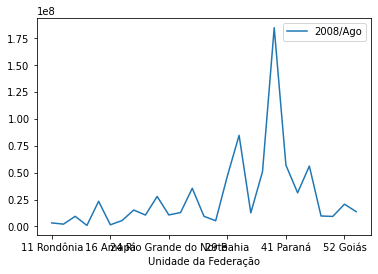

In [25]:
dados.plot(x="Unidade da Federação", y="2008/Ago")

## **Gráfico de Barras**

Começamos a ter uma visualização melhor graficamente.

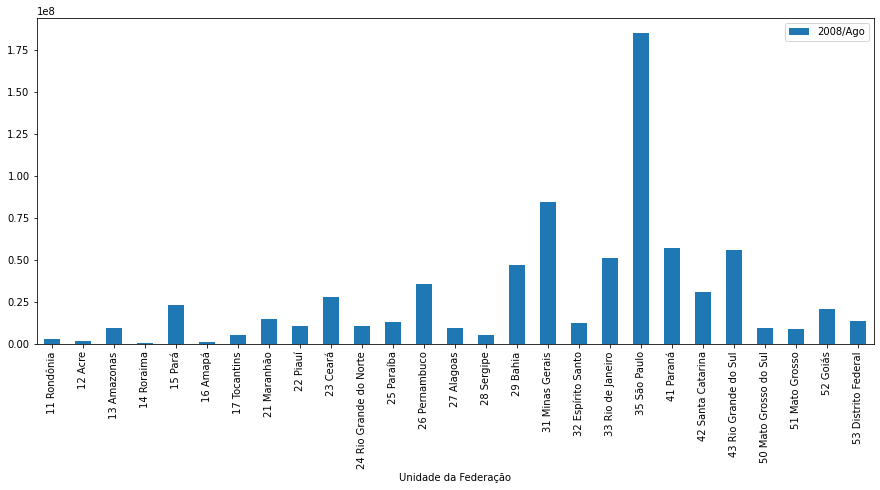

In [26]:
#Precisamos de uma forma melhor de visualização gráfica, optando assim pelo gráfico de barras. "ax reprenta os eixos do gráfico"
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize = (15,6))

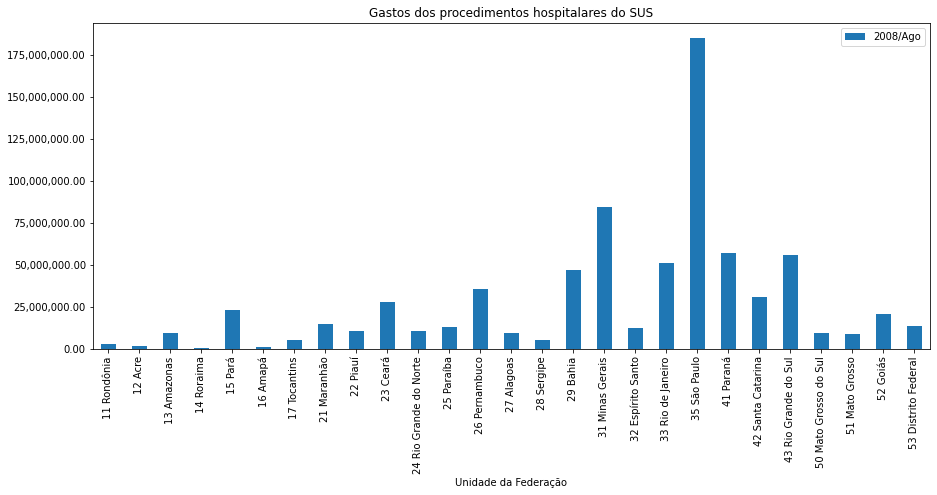

In [27]:
#parâmetro {x:,.2f} : queremos visualizar em float com duas casas decimais.
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize = (15,6)) 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))                                           #nesse caso, precisamos desse import para melhorar a visualização dos dados
#Colocando um título:
plt.title("Gastos dos procedimentos hospitalares do SUS")
#show(): esconde um retorno antes do gráfico. 
plt.show()                                                                                                    #essa função tira o retorno que aparece antes do gráfico.

## **Desafio 1**

Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.

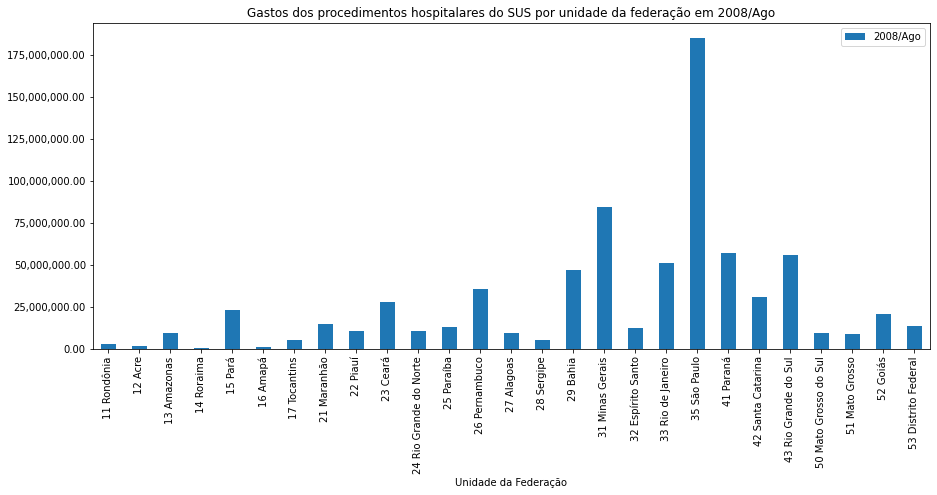

In [28]:
#parâmetro {x:,.2f} : queremos visualizar em float com duas casas decimais.
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize = (15,6)) 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))                                           #nesse caso, precisamos desse import para melhorar a visualização dos dados
#Colocando um título:
plt.title("Gastos dos procedimentos hospitalares do SUS por unidade da federação em 2008/Ago")
#show(): esconde um retorno antes do gráfico. 
plt.show()       

## **Desafio 2**

Desafio 02: Faça a mesma análise realizada em aula, porém para o mês mais recente.

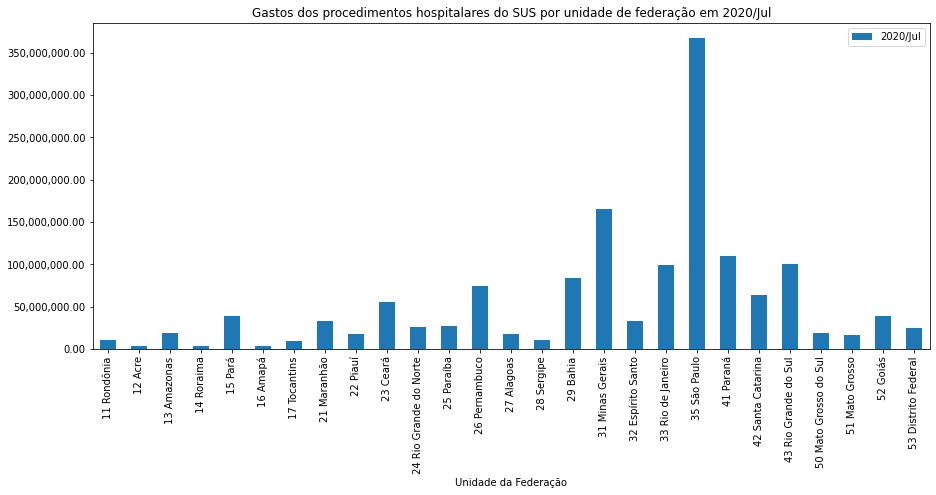

In [29]:
#Observamos que o último mês da base de dados é Ago/2020. Entretanto, temos um dado com erro, precisamos ajustar.
dados["2020/Ago"].replace("-",value="0")
ax = dados.plot(x="Unidade da Federação", y="2020/Jul", kind="bar", figsize = (15,6)) 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Gastos dos procedimentos hospitalares do SUS por unidade de federação em 2020/Jul")
#show(): esconde um retorno antes do gráfico. 
plt.show()  